# Preparation

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-fuel-and-emissions-2000-2013/Car Fuel and Emissions 2000-2013.csv


# Load and preprocess the data

In [2]:
# Load the data
dtype_dict = {
    'column_6': 'object',
    'column_30': 'object'
}

df = pd.read_csv(
    '/kaggle/input/car-fuel-and-emissions-2000-2013/Car Fuel and Emissions 2000-2013.csv',
    dtype=dtype_dict,
    low_memory=False
)

In [3]:
# Show the first five rows of the dataset
df.head()

,file,year,manufacturer,model,description,euro_standard,tax_band,transmission,transmission_type,engine_capacity,...,nox_emissions,thc_nox_emissions,particulates_emissions,fuel_cost_12000_miles,fuel_cost_6000_miles,standard_12_months,standard_6_months,first_year_12_months,first_year_6_months,date_of_change
0,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,2,NaN,M5,Manual,1598.0,...,NaN,NaN,NaN,NaN,618.0,NaN,NaN,NaN,NaN,NaN
1,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,2,NaN,M5,Manual,1747.0,...,NaN,NaN,NaN,NaN,633.0,NaN,NaN,NaN,NaN,NaN
2,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,Cloverleaf,2,NaN,M5,Manual,1970.0,...,NaN,NaN,NaN,NaN,663.0,NaN,NaN,NaN,NaN,NaN
3,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,2,NaN,M5,Manual,1598.0,...,NaN,NaN,NaN,NaN,626.0,NaN,NaN,NaN,NaN,NaN
4,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,2,NaN,M5,Manual,1747.0,...,NaN,NaN,NaN,NaN,633.0,NaN,NaN,NaN,NaN,NaN


In [4]:
# Data cleaning
df.isnull().sum()
df = df.dropna()

df['year'] = pd.to_datetime(df['year'], format='%Y')
df['manufacturer'] = df['manufacturer'].str.strip()
df['model'] = df['model'].str.strip()

In [5]:
# Display the updated data column entries
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   file                    0 non-null      object        
 1   year                    0 non-null      datetime64[ns]
 2   manufacturer            0 non-null      object        
 3   model                   0 non-null      object        
 4   description             0 non-null      object        
 5   euro_standard           0 non-null      int64         
 6   tax_band                0 non-null      object        
 7   transmission            0 non-null      object        
 8   transmission_type       0 non-null      object        
 9   engine_capacity         0 non-null      float64       
 10  fuel_type               0 non-null      object        
 11  urban_metric            0 non-null      float64       
 12  extra_urban_metric      0 non-null      float64       
 13  combine

# Exploratory Data Analysis (EDA)

## Phase 1: Data formatting

In [6]:
# Import libraries and/or dependencies first
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Analyze missing values of the dataset
df = pd.read_csv(
    '/kaggle/input/car-fuel-and-emissions-2000-2013/Car Fuel and Emissions 2000-2013.csv',
    low_memory=False
)

# Exclude any leading or trailing whitespace from the column names
df.columns = df.columns.str.strip()

In [7]:
print("Data information:")
print(df.info())

print("First few rows:")
print(df.head())

print("Missing values:")
print(df.isnull().sum())

Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45511 entries, 0 to 45510
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   file                    45511 non-null  object 
 1   year                    45511 non-null  int64  
 2   manufacturer            45511 non-null  object 
 3   model                   45511 non-null  object 
 4   description             45511 non-null  object 
 5   euro_standard           45511 non-null  int64  
 6   tax_band                7837 non-null   object 
 7   transmission            45501 non-null  object 
 8   transmission_type       45170 non-null  object 
 9   engine_capacity         45504 non-null  float64
 10  fuel_type               45511 non-null  object 
 11  urban_metric            45498 non-null  float64
 12  extra_urban_metric      45498 non-null  float64
 13  combined_metric         45504 non-null  float64
 14  urban_imperial      

In [8]:
# Fill the missing values in 'engine_capacity' column w/the mean value of the column
df['engine_capacity'] = df['engine_capacity'].fillna(df['engine_capacity'].mean())
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df = df.dropna(subset=['year'])

# Analyze data types after conversion
print("Data types after conversion:")
print(df.dtypes)

# Display summary statistics
print("Summary statistics:")
print(df.describe())

Data types after conversion:
file                       object
year                        int64
manufacturer               object
model                      object
description                object
euro_standard               int64
tax_band                   object
transmission               object
transmission_type          object
engine_capacity           float64
fuel_type                  object
urban_metric              float64
extra_urban_metric        float64
combined_metric           float64
urban_imperial            float64
extra_urban_imperial      float64
combined_imperial         float64
noise_level               float64
co2                         int64
thc_emissions             float64
co_emissions              float64
nox_emissions             float64
thc_nox_emissions         float64
particulates_emissions    float64
fuel_cost_12000_miles     float64
fuel_cost_6000_miles      float64
standard_12_months        float64
standard_6_months         float64
first_year_12_month

## Phase 2: Data visualization

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


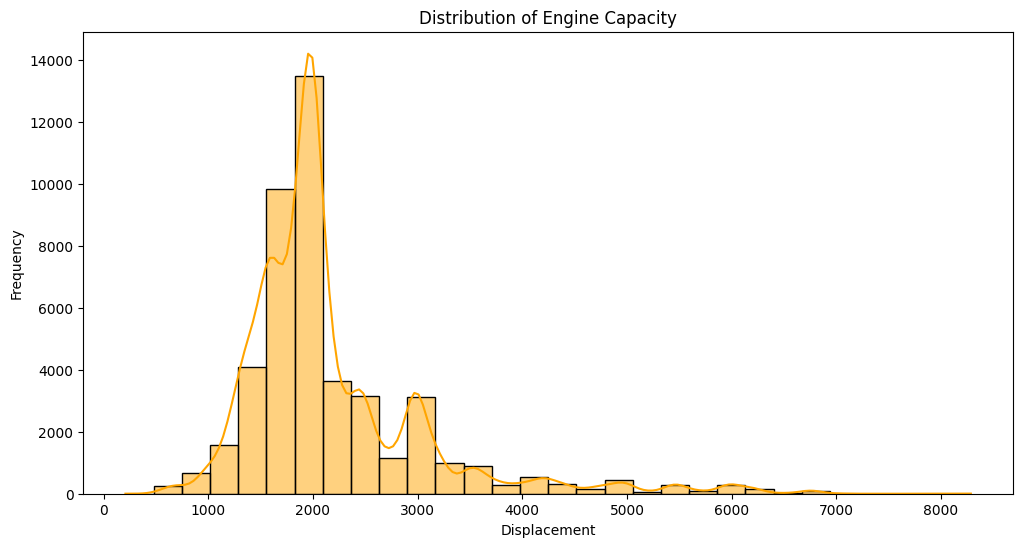

In [10]:
# Visualize the distribution of 'engine_capacity'
plt.figure(figsize=(12, 6))
sns.histplot(df['engine_capacity'], bins=30, kde=True, color='orange')
plt.title('Distribution of Engine Capacity')
plt.xlabel('Displacement')
plt.ylabel('Frequency')
plt.show()

In [11]:
# Visualize the number of unique values in categorical columns
print("Unique values in categorical columns:")

categorical_cols = [
    'manufacturer',
    'model',
    'transmission',
    'euro_standard',
    'tax_band'
]

for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts())

Unique values in categorical columns:
manufacturer: 62 unique values
manufacturer
Mercedes-Benz    5836
Vauxhall         4139
Volkswagen       3593
BMW              2943
Ford             2916
                 ... 
Dacia               9
MG Motors Uk        8
McLaren             8
Tata                7
MG Motors UK        5
Name: count, Length: 62, dtype: int64
model: 2649 unique values
model
3 Series E90/E91/E92/E93     495
3 Series E46                 409
1 Series E81/E82/E87/E88     291
911                          272
5 Series E60/E61             264
                            ... 
MC12                           1
New Superb Estate              1
Megane Renault Sport 2012      1
CL-Class, Model Year 2014      1
Phantom Drophead Coupé         1
Name: count, Length: 2649, dtype: int64
transmission: 92 unique values
transmission
M5        13385
M6        10798
A5         4421
A6         3414
A4         3127
          ...  
MCVT          1
5A/Tx2        1
Hybrid        1
M8            1

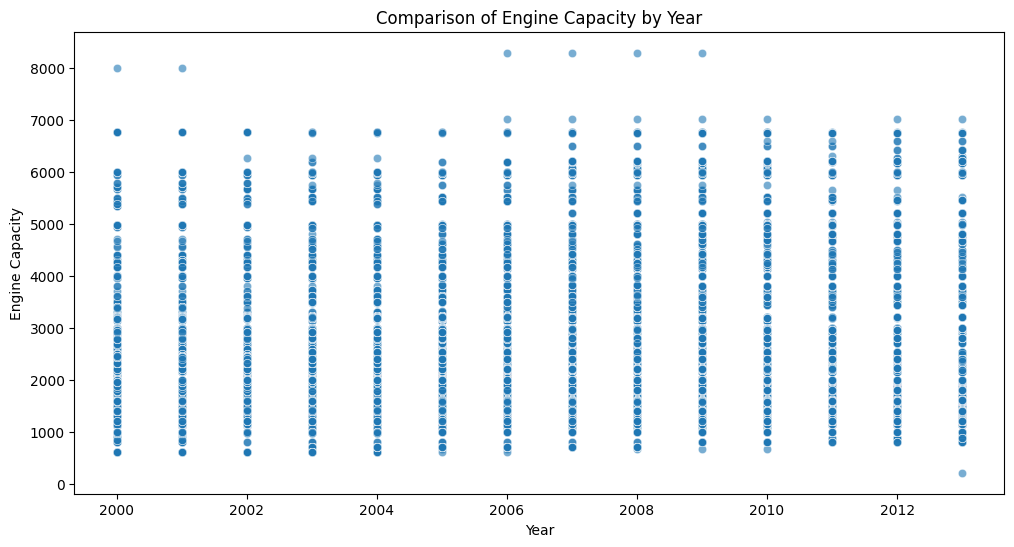

In [13]:
# Generate scatter plot of 'engine_capacity' against 'year' to show trends
plt.figure(figsize=(12, 6))
sns.scatterplot(x='year', y='engine_capacity', data=df, alpha=0.6)
plt.title('Comparison of Engine Capacity by Year')
plt.xlabel('Year')
plt.ylabel('Engine Capacity')
plt.show()

# Feature engineering

In [14]:
# Create categories for displacement
df['engine_capacity_category'] = pd.cut(
    df['engine_capacity'],
    bins=5,
    labels=['Very Low', 'Low', 'Medium', 'High', 'Very High']
)

print(df[['engine_capacity', 'engine_capacity_category']].head())

   engine_capacity engine_capacity_category
0           1598.0                 Very Low
1           1747.0                 Very Low
2           1970.0                      Low
3           1598.0                 Very Low
4           1747.0                 Very Low


# K-means clustering

In [15]:
# Import libraries and/or dependencies first
import sklearn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Generate warnings
import warnings
warnings.filterwarnings("ignore")

# Adjust features
features = df[['engine_capacity']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=['engine_capacity'])

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

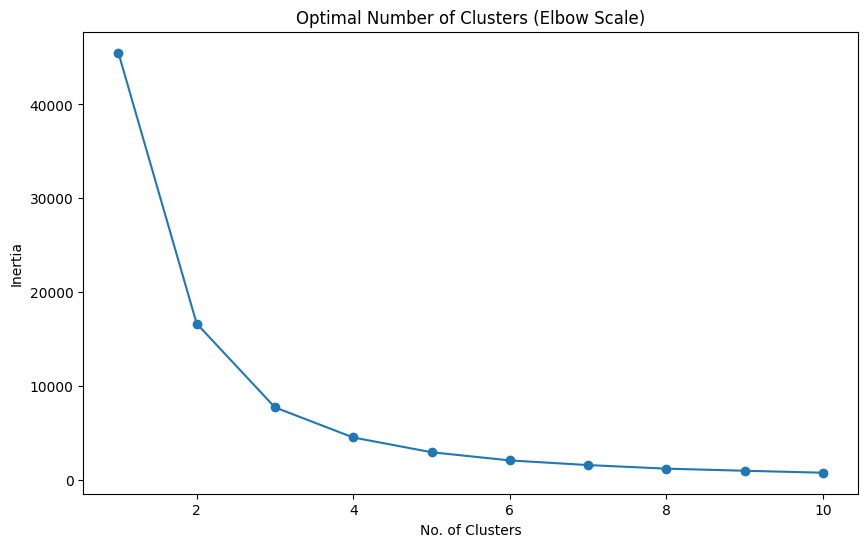

In [16]:
# Visualize k-means before applying the inertia clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Optimal Number of Clusters (Elbow Scale)')
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.show()

In [17]:
# Apply k-means clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

df['cluster'] = kmeans.fit_predict(scaled_df)

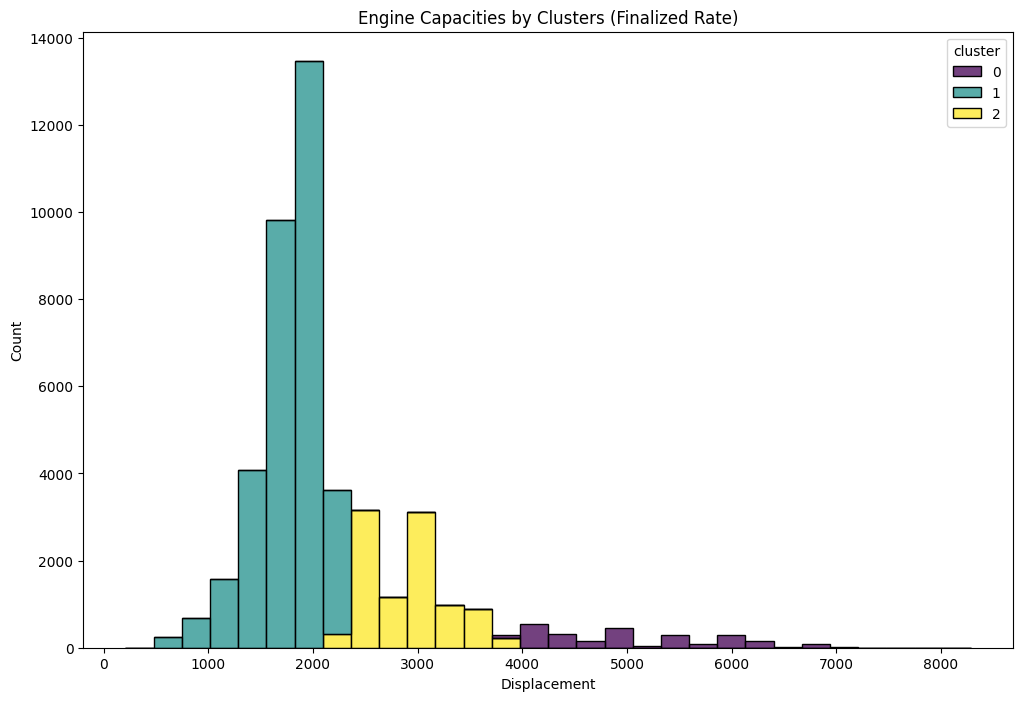

In [18]:
# Visualize k-means after applying the inertia clusters
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='engine_capacity', hue='cluster', palette='viridis', bins=30, multiple='stack')
plt.title('Engine Capacities by Clusters (Finalized Rate)')
plt.xlabel('Displacement')
plt.ylabel('Count')
plt.show()

# Predictive modelling

In [22]:
# Import libraries and/or dependencies first
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define the feature matrix along with the target variable
X = df[['year', 'cluster']]
y = df['engine_capacity']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 909.55745424298


# Extra step 1: Interactive scatter plot

In [23]:
# Import libraries and/or dependencies first
import plotly.express as px

# Generate an interactive scatter plot to display vehicle clusters
fig = px.scatter(
    df,
    x='year',
    y='engine_capacity',
    color='cluster',
    hover_data=['manufacturer', 'model'],
    title='Vehicle Clusters: Displacement vs. Mileage',
    labels={'car_age': 'Mileage (years)', 'engine_capacity': 'Displacement (cc)'}
)
fig.show()

# Extra step 2: Animated line chart

In [24]:
# Generate an animated line chart to display changes in engine capacity by period
fig = px.line(
    df,
    x='year',
    y='engine_capacity',
    color='manufacturer',
    animation_frame='year',
    title='Engine Capacity Changes Over Time by Manufacturer'
)
fig.show()